In [1]:
# load the necessary packages  
import time
start_time = time.time()  
import numpy as np    
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns  
sns.set(color_codes=True)
import json 
import os
from sklearn.svm import SVC 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn import preprocessing
from sklearn.metrics import average_precision_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
import scipy.stats as stats 
from scipy.stats import zscore 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from hyperopt import hp
from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer  
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import LabelBinarizer 
from sklearn.preprocessing import Normalizer   
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler
import copy
import math 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Part A
# Domain: Automobile 
# Project objective: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories

In [3]:
# Q.1(A) 
# Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [4]:
# Solution 
Car_name = pd.read_csv('Car name.csv')
Car_name1 = pd.DataFrame(Car_name)

In [5]:
Car_name1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [6]:
Car_name1.shape

(398, 1)

In [7]:
# Q.1(B) 
# Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [8]:
Car_attributes = pd.read_json('Car-Attributes.json')
Car_attributes1 = pd.DataFrame(Car_attributes)

In [9]:
Car_attributes1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [10]:
Car_attributes1.shape

(398, 8)

In [11]:
# Q.1(C) 
# Merge both the DataFrames together to form a single DataFrame

In [12]:
Cardata = pd.concat([Car_name1,Car_attributes1],axis=1)
Cardata.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [13]:
Cardata.shape

(398, 9)

In [14]:
# Q.1(D) 
# Print 5 point summary of the numerical features and share insights

In [15]:
Cardata.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
# Insights 
# The median mileage is 23 mpg. The minimum mileage is 9 mpg while the max mileage is a whopping 47 mpg (approx)  
# The median no. of cylinders is 4, minimum is 3 while the maxiumum is 8
# The median engine displacement is 148.50 cubic centimetres (CC). The minimum is 68 CC while the maximum is 455 CC
# The median weight is 2804 Kg (approx), the minimum is 1613 Kg and the maximum is 5140 Kg.
# The median acceleration is 15.50 m/s², the minimum is 8 m/s² and the maximum is 24.80 m/s² 

In [17]:
# Q.2(A) 
# Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [18]:
Cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [19]:
# Detecting missing value
Cardata.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [20]:
# Detecting blank values in the dataset
Cardata = Cardata.replace(r'^\s*$', np.nan, regex=True)
Cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [21]:
# Part A 2(B) 
# Check for duplicate values in the data and impute with the best suitable approach.

In [22]:
duplicate = Cardata.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

Number of duplicate rows = 0


In [23]:
# Mileage (mpg) is impacted by the age of the vehicle. As age increases, mileage tends to decrease. 
# Hence, age makes more sense than the model year 
# Assumption: Study year is 1983  
# Age of the vehicle 
Cardata['age'] = 83-Cardata['yr']

In [24]:
Cardata.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,age
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,13
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,13
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,13
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,13
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1,13


In [25]:
# Origin denotes production orign so, it is necessary to break it into dummy variables. One hot encoding is used for this 
one_hot = pd.get_dummies(Cardata['origin'])
one_hot = one_hot.add_prefix('origin_')
Cardata = Cardata.join(one_hot)
Cardata.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,age,origin_1,origin_2,origin_3
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,13,1,0,0
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,13,1,0,0
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,13,1,0,0
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,13,1,0,0
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1,13,1,0,0


In [26]:
# Dropping redundant columns
Cardata_New = Cardata.drop(['car_name','yr','origin'],axis =1)
Cardata_New.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,13,1,0,0
1,15.0,8,350.0,165,3693,11.5,13,1,0,0
2,18.0,8,318.0,150,3436,11.0,13,1,0,0
3,16.0,8,304.0,150,3433,12.0,13,1,0,0
4,17.0,8,302.0,140,3449,10.5,13,1,0,0


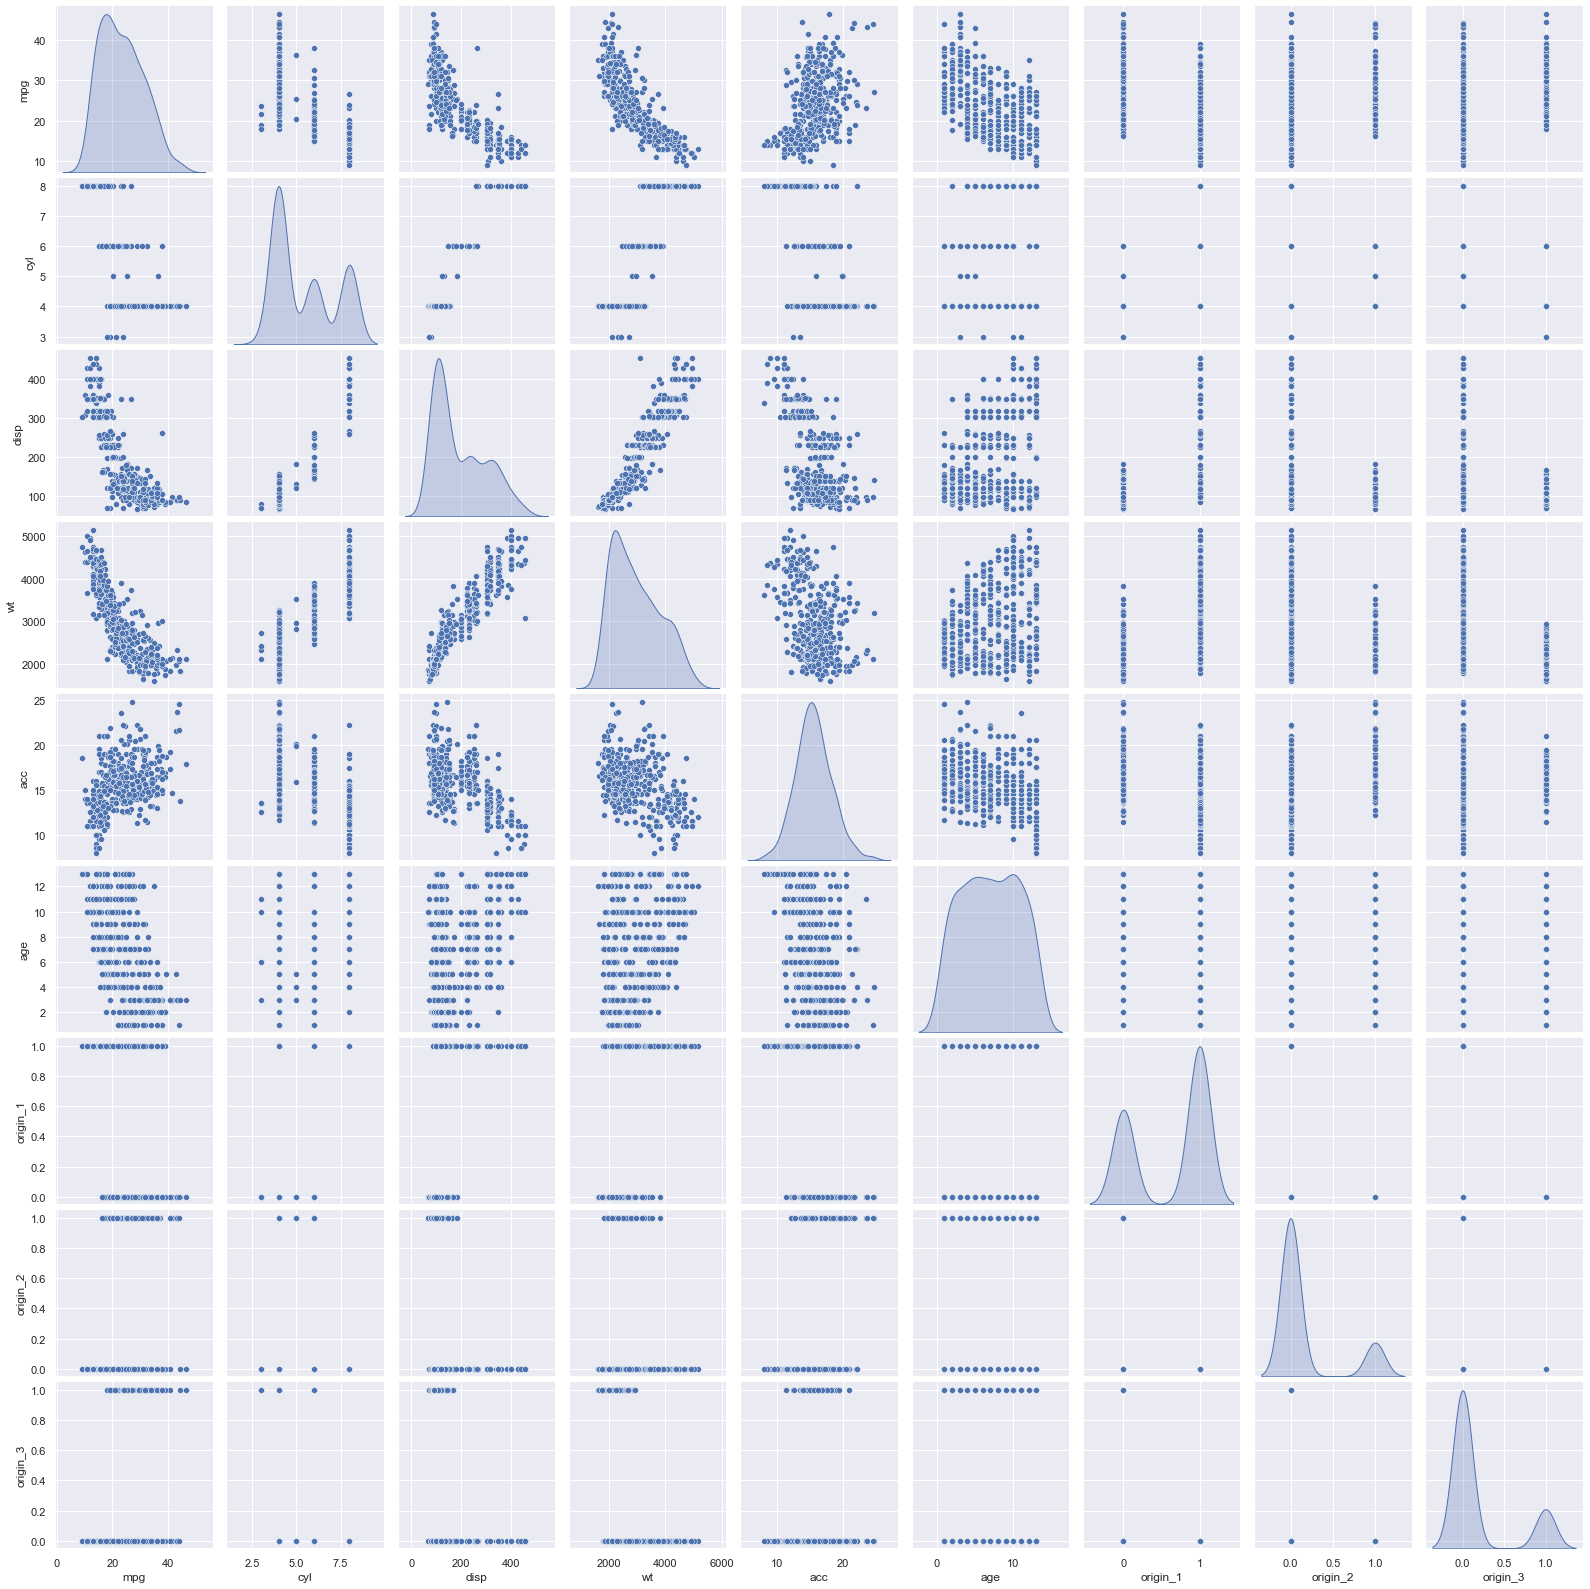

In [27]:
# Q.2(C) 
# Plot a pairplot for all features
sns.pairplot(Cardata_New,diag_kind='kde')

<AxesSubplot:xlabel='wt', ylabel='disp'>

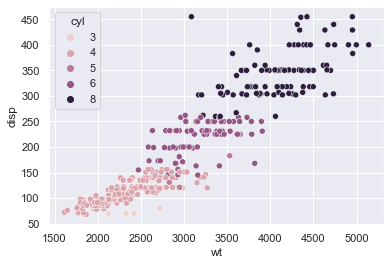

In [28]:
# Q.2(D) 
# Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.
sns.scatterplot(data=Cardata_New, x="wt", y="disp",hue="cyl")

In [29]:
# Q.2(E)
# Share insights for Q.2(D).

In [30]:
# A positive relationship between weight and displacement is seen. As weight increases, displacement increases. 
# Displacement is the engine capacity of a vehicle. It shows the combined volume of all cylinders.
# Heavier vehicles exhibit greater inertia or rolling resistance. 
# In order to mitigate the effect of inertia, more cylinders are added. More cylinders augment engine power.
# This is precisely seen in the scatter plot. 
# As vehicle weight increases, more cylinders are added which ultimately led to higher displacement. 

<AxesSubplot:xlabel='wt', ylabel='mpg'>

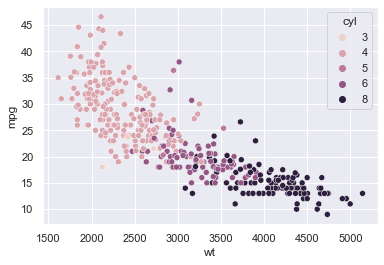

In [31]:
# Q.2(F)
# Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. 
sns.scatterplot(data=Cardata_New, x="wt", y="mpg",hue="cyl")

In [32]:
# Q.2(G)
# Share insights for Q.2(F)

In [33]:
# An inverse relationship between weight and mpg is discernible from the scatter plot. As weight increases, mileage decreases.  
# It becomes pronounced in the case of vehicles with more cylinders. Lesser number of cylinders produces more fuel economy.
# As more cylinders are added to bolster power and performance, fuel efficiency in terms of mpg decreases. 

In [34]:
# Q.2(H)
# Check for unexpected values in all the features and datapoints with such values

In [35]:
# On careful inspection, we found ? for hp values 
Cardata_New[Cardata_New['hp']=="?"]

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
32,25.0,4,98.0,?,2046,19.0,12,1,0,0
126,21.0,6,200.0,?,2875,17.0,9,1,0,0
330,40.9,4,85.0,?,1835,17.3,3,0,1,0
336,23.6,4,140.0,?,2905,14.3,3,1,0,0
354,34.5,4,100.0,?,2320,15.8,2,0,1,0
374,23.0,4,151.0,?,3035,20.5,1,1,0,0


In [36]:
Cardata_New['hp'].replace("?",np.nan, inplace=True)
hp = Cardata_New['hp'].dropna()
hp.count()

392

In [37]:
# Data inspection after dropping 'na' from Cardata_New['hp'] 
Cardata_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   age       398 non-null    int64  
 7   origin_1  398 non-null    uint8  
 8   origin_2  398 non-null    uint8  
 9   origin_3  398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


<AxesSubplot:xlabel='hp', ylabel='Density'>

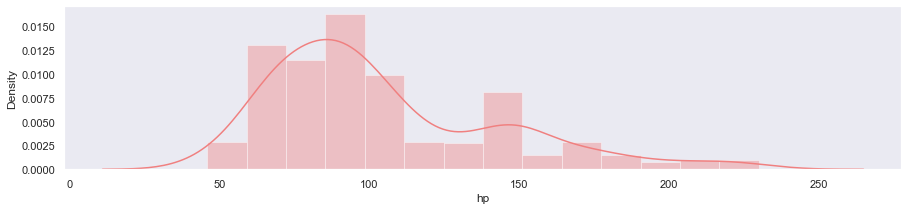

In [38]:
# Distribution of Cardata_New['hp']
ax = plt.subplots(figsize=(15,3))      
plt.grid(False)
sns.set_color_codes()
sns.distplot(Cardata_New.hp, color="lightcoral")

In [39]:
# Cardata_New['hp'] is a skewed distribution, hence Median can be used for imputation of missing values 
# Median of Cardata_New['hp'] pre imputation 
Cardata_New['hp'].median()

93.5

In [40]:
# Imputation of missing values in Cardata_New['hp'] 
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(Cardata_New[['hp']])
Cardata_New[['hp']] = imputer.transform(Cardata_New[['hp']])
Cardata_New['hp'] = Cardata_New['hp'].astype('float')

In [41]:
Cardata_New.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
age           int64
origin_1      uint8
origin_2      uint8
origin_3      uint8
dtype: object

In [42]:
# Data inspection post imputation 
Cardata_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   age       398 non-null    int64  
 7   origin_1  398 non-null    uint8  
 8   origin_2  398 non-null    uint8  
 9   origin_3  398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


In [43]:
# Median of Cardata_New['hp'] post imputation 
Cardata_New['hp'].median()

93.5

In [44]:
# Q.3(A)
# Apply K-Means clustering for 2 to 10 clusters

<AxesSubplot:>

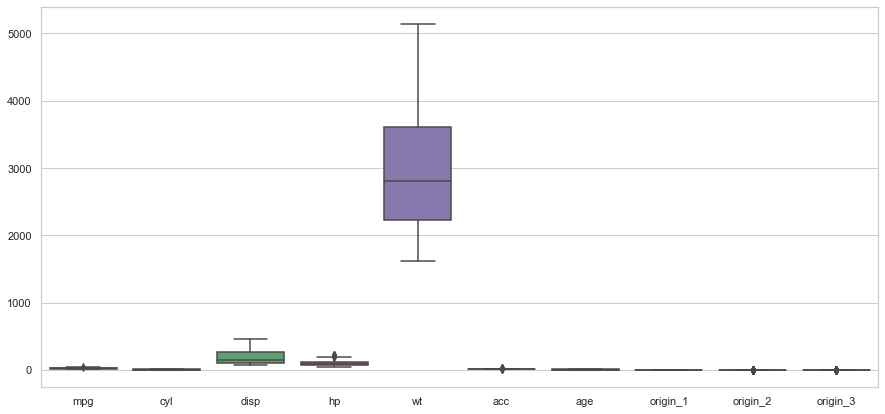

In [45]:
# Outliers detection
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,7))
sns.boxplot(data=Cardata_New)

In [46]:
# Detected outliers in mpg, hp and acc

<AxesSubplot:xlabel='mpg'>

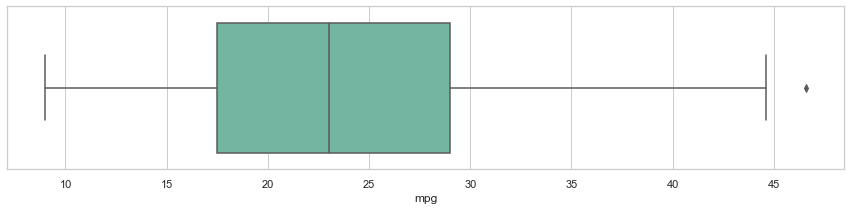

In [47]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,3))
sns.boxplot(Cardata_New.mpg, orient="h", palette="Set2")

<AxesSubplot:xlabel='hp'>

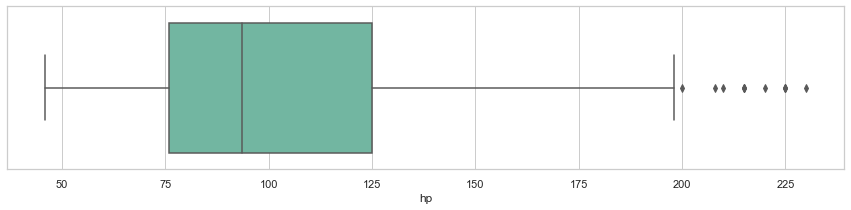

In [48]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,3))
sns.boxplot(Cardata_New.hp, orient="h", palette="Set2")

<AxesSubplot:xlabel='acc'>

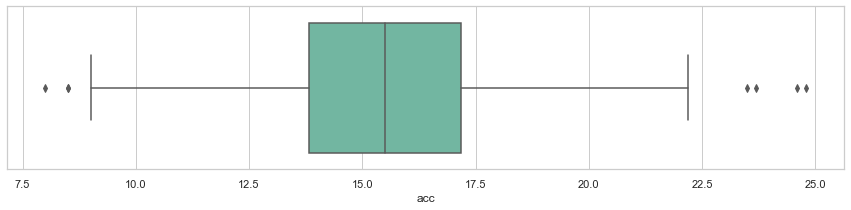

In [49]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,3))
sns.boxplot(Cardata_New.acc, orient="h", palette="Set2")

In [50]:
# In order to remove the outliers, we will apply logarithmic transformation. 
# Logarithmic transformation helps in restoring symmetry of the data 
Cardata_New['mpg'] = np.log(Cardata_New['mpg'])
Cardata_New['hp'] = np.log(Cardata_New['hp'])
Cardata_New['acc'] = np.log(Cardata_New['acc'])
Cardata_New.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,2.890372,8,307.0,4.867534,3504,2.484907,13,1,0,0
1,2.708050,8,350.0,5.105945,3693,2.442347,13,1,0,0
2,2.890372,8,318.0,5.010635,3436,2.397895,13,1,0,0
3,2.772589,8,304.0,5.010635,3433,2.484907,13,1,0,0
4,2.833213,8,302.0,4.941642,3449,2.351375,13,1,0,0


In [51]:
# Detecting outliers post log transformation 

<AxesSubplot:xlabel='mpg'>

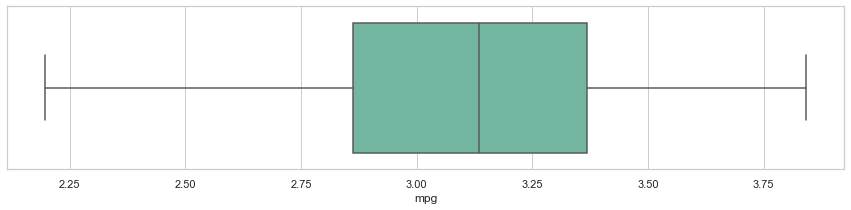

In [52]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,3))
sns.boxplot(Cardata_New.mpg, orient="h", palette="Set2")

<AxesSubplot:xlabel='hp'>

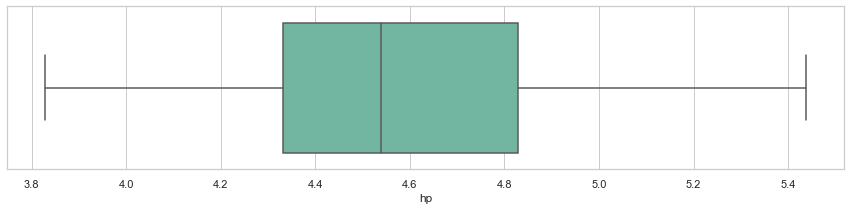

In [53]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,3))
sns.boxplot(Cardata_New.hp, orient="h", palette="Set2")

<AxesSubplot:xlabel='acc'>

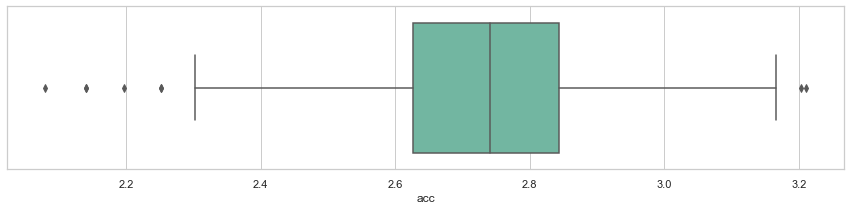

In [54]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,3))
sns.boxplot(Cardata_New.acc, orient="acc", palette="Set2")

<AxesSubplot:>

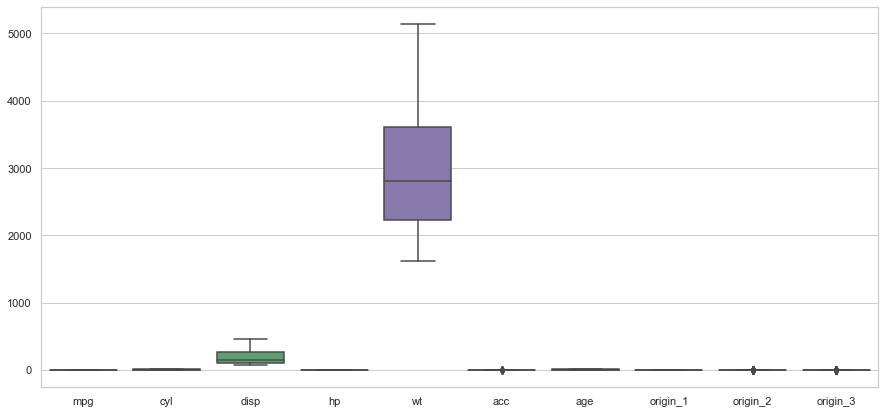

In [55]:
# Post removal of Outliers, 
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(15,7))
sns.boxplot(data=Cardata_New)

In [56]:
# Scaling 
# Variables with larger scales exert a greater influence on the distance.  
# Hence, it is imperative to convert all variables in the dataset to the same scale. 
from scipy.stats import zscore
Cardata_New.dtypes
numeric_cols = Cardata_New.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
Cardata_New[numeric_cols] = Cardata_New[numeric_cols].apply(zscore)

In [57]:
Cardata_New.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,-0.622035,1.498191,1.090604,0.823608,0.630870,-1.353748,1.627426,1,0,0
1,-1.159493,1.498191,1.503514,1.523992,0.854333,-1.589535,1.627426,1,0,0
2,-0.622035,1.498191,1.196232,1.243998,0.550470,-1.835805,1.627426,1,0,0
3,-0.969242,1.498191,1.061796,1.243998,0.546923,-1.353748,1.627426,1,0,0
4,-0.790530,1.498191,1.042591,1.041316,0.565841,-2.093533,1.627426,1,0,0


In [58]:
# K-Means clustering for 2-10 clusters
cluster_range = range(2,11)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 10, random_state=10)
    clusters.fit(Cardata_New)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:11]

,num_clusters,cluster_errors
0,2,1435.661694
1,3,1072.434353
2,4,873.696202
3,5,786.882347
4,6,718.453137
5,7,668.693158
6,8,626.225285
7,9,592.806261
8,10,558.802968


In [59]:
# Q.3(B)
# Plot a visual and find elbow point

Text(0, 0.5, 'Cluster Errors')

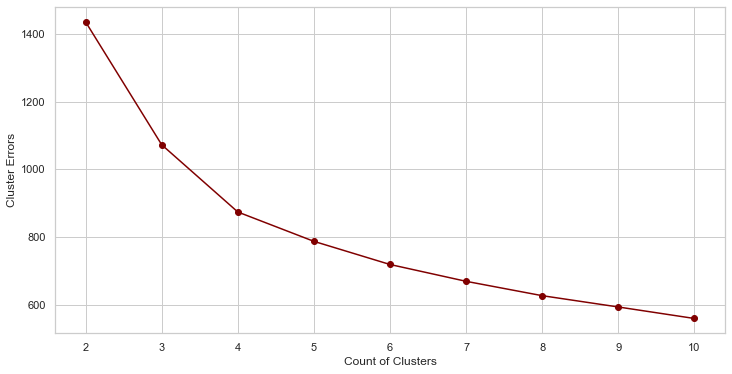

In [60]:
from matplotlib import cm
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o", c = 'maroon')
plt.xlabel('Count of Clusters')
plt.ylabel('Cluster Errors')

In [61]:
# Q.3(C)
# On the above visual, highlight which are the possible Elbow points.

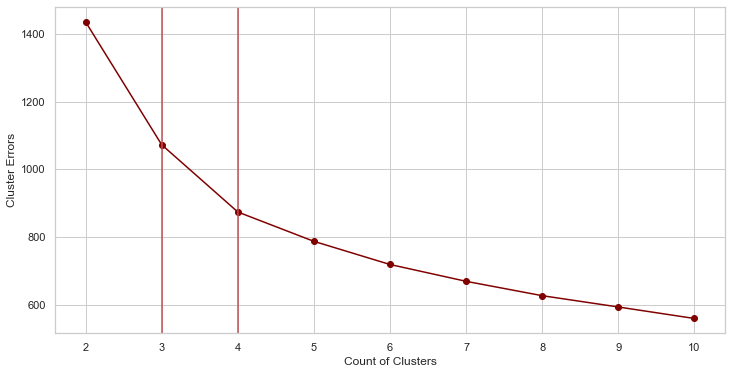

In [62]:
from matplotlib import cm
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o", c = 'maroon')
plt.xlabel('Count of Clusters')
plt.ylabel('Cluster Errors')
plt.axvline(x = 3, color = 'r', linestyle = '-')
plt.axvline(x = 4, color = 'r', linestyle = '-')

In [63]:
# Based on the Elbow method, the possible elbow points are 3 and 4. The inflection points of the trajectory is 
# discernible at cluster 3 and 4. This is entirely based on visual inspection.  

In [64]:
# Q.3(D)
# Train a K-means clustering model once again on the optimal number of clusters

In [65]:
# Optimal K (number of clusters = K)
# We will validate the manual choice of K in the Elbow method with the Silhouette method 

In [66]:
from sklearn.metrics import silhouette_score, silhouette_score
sil = []
kmax = 10
for k in range(2, kmax+1): 
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state=10).fit(Cardata_New)
    labels = kmeans.labels_
    sil.append(silhouette_score(Cardata_New, labels, metric = 'euclidean'))

silhouette_score = silhouette_score(Cardata_New, labels, metric = 'euclidean')
print(
        "For K clusters =",
        range(2, kmax+1),
        "The silhouette scores are :",
        sil
    )

For K clusters = range(2, 11) The silhouette scores are : [0.4444938782323736, 0.33446445720726725, 0.31898376295480174, 0.3008788183588879, 0.2596903350772639, 0.2519934973834269, 0.23689349656990016, 0.23832496955740268, 0.24157270473950848]


Text(0, 0.5, 'Silhouette Score')

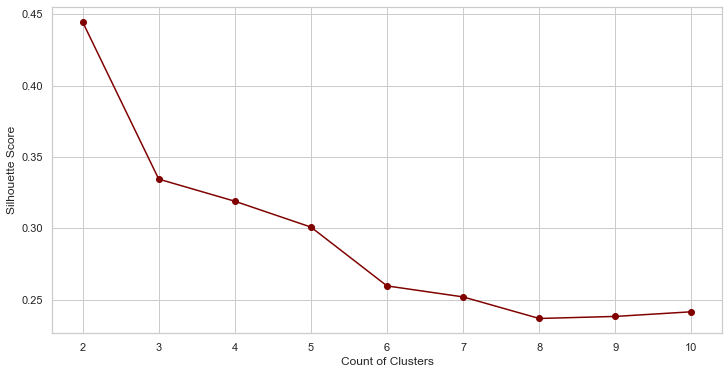

In [67]:
plt.figure(figsize=(12,6))
plt.plot(range(2, kmax+1), sil, marker = "o", c = 'maroon')
plt.xlabel('Count of Clusters')
plt.ylabel('Silhouette Score')

In [68]:
# Silhouette coefficient varies between -1 to 1. The higher the Silhouette coefficient, the better it is. 
# From the plot, it is evident that the trajectory of Silhouette coefficient tapers after the 5th cluster. 
# However, the Silhouette coefficient of the 4th cluster is a tad higher that the coefficient of the 5th cluster. 
# Higher the Silhouette coefficient, the better it is. 
# If we combine both the Elbow method and the Silhouette method, we found that the optimal number of clusters is 4. 

In [69]:
# K-means clustering model on the optimal number of clusters
kmeans = KMeans(n_clusters = 4, n_init = 10, random_state=10)
kmeans.fit(Cardata_New) 

KMeans(n_clusters=4, random_state=10)

In [70]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 10,
 'tol': 0.0001,
 'verbose': 0}

In [71]:
# Number of data in each cluster
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 96  94 117  91]


In [72]:
# Centroids of each cluster/group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(Cardata_New) )
centroid_df.transpose()

,0,1,2,3
mpg,0.337373,-1.306300e+00,1.080530,-0.395798
cyl,-0.868584,1.498191e+00,-0.821104,0.424430
disp,-0.824059,1.503923e+00,-0.773034,0.309735
hp,-0.545073,1.442656e+00,-0.799132,0.112262
wt,-0.770282,1.404098e+00,-0.748370,0.324409
acc,0.308195,-1.150226e+00,0.426220,0.315020
age,0.657116,6.883238e-01,-1.087358,-0.006206
origin_1,0.250000,1.000000e+00,0.410256,0.912088
origin_2,0.468750,-2.498002e-16,0.188034,0.032967
origin_3,0.281250,8.326673e-17,0.401709,0.054945


In [73]:
# Q.3(E)
# Add a new feature in the DataFrame which will have labels based upon cluster value

In [74]:
predictions = kmeans.predict(Cardata_New)
predictions
Cardata_New["group"] = predictions
Cardata_New['group'] = Cardata_New['group'].astype('category')
Cardata_New.dtypes

mpg          float64
cyl          float64
disp         float64
hp           float64
wt           float64
acc          float64
age          float64
origin_1       uint8
origin_2       uint8
origin_3       uint8
group       category
dtype: object

In [75]:
# Q.3(F)
# Plot a visual and color the datapoints based upon clusters

<AxesSubplot:xlabel='origin_3', ylabel='group'>

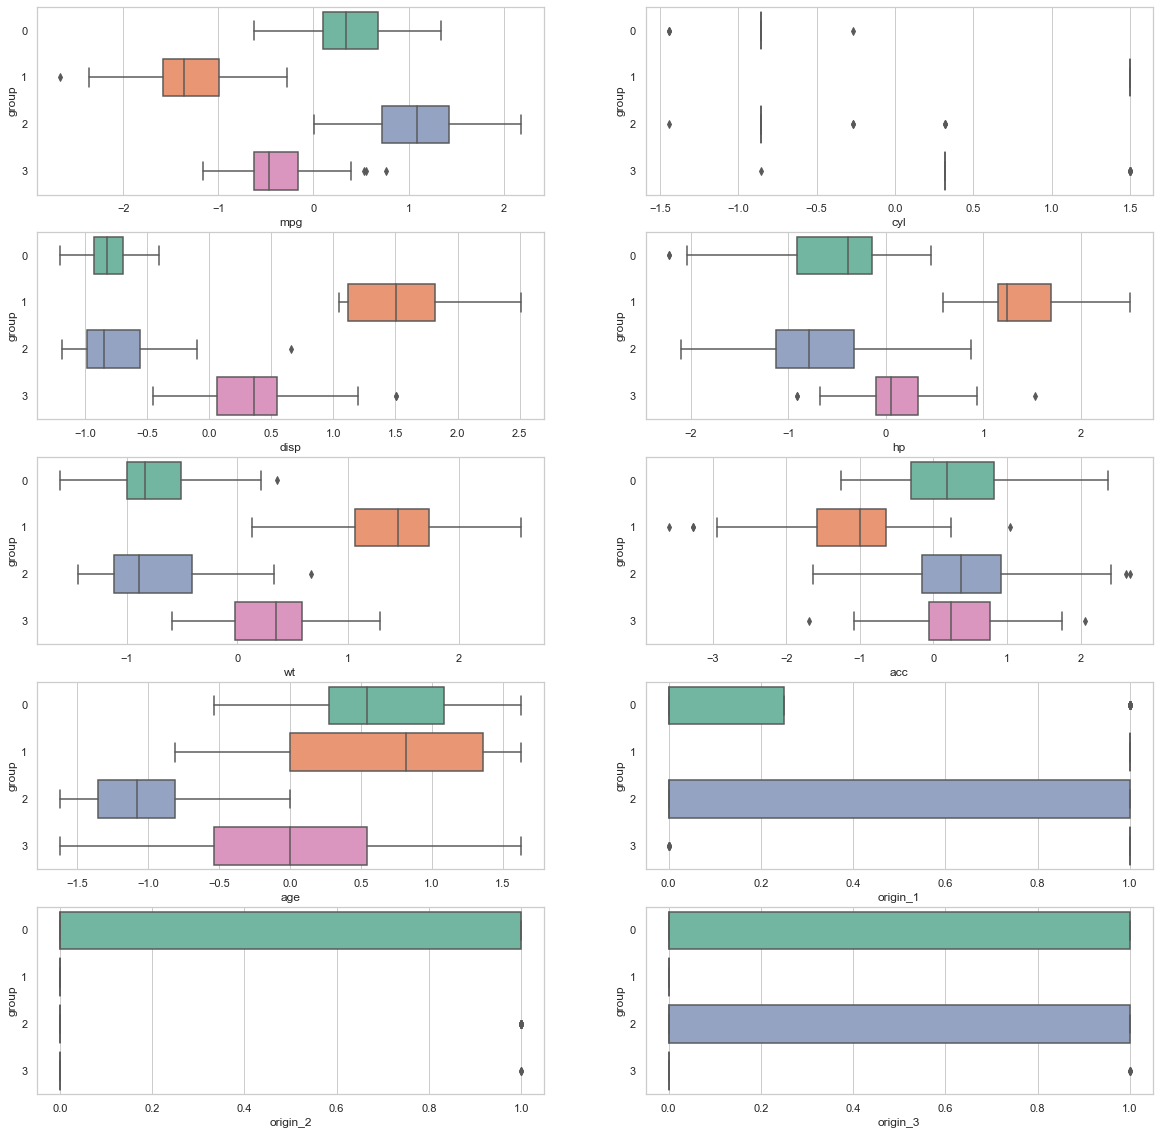

In [76]:
fig, axes = plt.subplots(5, 2,figsize=(20,20))
sns.set_style('whitegrid')
sns.boxplot(data = Cardata_New, x = 'mpg', y='group', orient="h", palette="Set2", ax=axes[0,0])
sns.boxplot(data = Cardata_New, x = 'cyl', y='group', orient="h", palette="Set2", ax=axes[0,1])
sns.boxplot(data = Cardata_New, x = 'disp', y='group', orient="h", palette="Set2", ax=axes[1,0])
sns.boxplot(data = Cardata_New, x = 'hp', y='group', orient="h", palette="Set2", ax=axes[1,1])
sns.boxplot(data = Cardata_New, x = 'wt', y='group', orient="h", palette="Set2", ax=axes[2,0])
sns.boxplot(data = Cardata_New, x = 'acc', y='group', orient="h", palette="Set2", ax=axes[2,1])
sns.boxplot(data = Cardata_New, x = 'age', y='group', orient="h", palette="Set2", ax=axes[3,0])
sns.boxplot(data = Cardata_New, x = 'origin_1', y='group', orient="h", palette="Set2", ax=axes[3,1])
sns.boxplot(data = Cardata_New, x = 'origin_2', y='group', orient="h", palette="Set2", ax=axes[4,0])
sns.boxplot(data = Cardata_New, x = 'origin_3', y='group', orient="h", palette="Set2", ax=axes[4,1])

In [77]:
# Q.3(G)
# Pass a new DataPoint and predict which cluster it belongs to.

In [78]:
# Data point 
Cardata_New["mpg"] = 25
Cardata_New["cyl"] = 4
Cardata_New["disp"] = 150
Cardata_New["hp"] = 90
Cardata_New["wt"] = 2500
Cardata_New["acc"] = 15
Cardata_New["age"] = 5
Cardata_New["origin_1"] = 0
Cardata_New["origin_2"] = 1
Cardata_New["origin_3"] = 0

In [79]:
kmeans.predict([[25,4,150,90,2500,15,5,0,1,0]])

array([1])

In [80]:
# The new datapoint lies in Cluster 1 

In [81]:
# Part B
# Domain: Automobile 
# Project objective: Apply dimensionality reduction technique – PCA and train a model and compare relative results

In [82]:
# Q.1(A)
# Read ‘vehicle.csv’ and save as DataFrame

In [83]:
# Solution 
Vehicle = pd.read_csv('vehicle.csv')
Vehicle_New = pd.DataFrame(Vehicle)

In [84]:
Vehicle_New.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [85]:
Vehicle_New.shape

(846, 19)

In [86]:
# Incosistency in column names 
# pr.axis_aspect_ratio, max.length_aspect_ratio, pr.axis_rectangularity, max.length_rectangularity, scaled_variance.1,
# scaled_radius_of_gyration.1, skewness_about.1, skewness_about.2
# Renaming the columns so as to maintain consistency 
Vehicle_New = Vehicle_New.rename(columns={"pr.axis_aspect_ratio":"pr_axis_aspect_ratio"})
Vehicle_New = Vehicle_New.rename(columns={"max.length_aspect_ratio":"max_length_aspect_ratio"})
Vehicle_New = Vehicle_New.rename(columns={"pr.axis_rectangularity":"pr_axis_rectangularity"})
Vehicle_New = Vehicle_New.rename(columns={"max.length_rectangularity":"max_length_rectangularity"})
Vehicle_New = Vehicle_New.rename(columns={"scaled_variance.1":"scaled_variance_1"})
Vehicle_New = Vehicle_New.rename(columns={"scaled_radius_of_gyration.1":"scaled_radius_of_gyration_1"})
Vehicle_New = Vehicle_New.rename(columns={"skewness_about.1":"skewness_about_1"})
Vehicle_New = Vehicle_New.rename(columns={"skewness_about.2":"skewness_about_2"})
Vehicle_New.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [87]:
# Q.1(B)
# Check percentage of missing values and impute with correct approach

In [88]:
Vehicle_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr_axis_aspect_ratio         844 non-null    float64
 5   max_length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr_axis_rectangularity       843 non-null    float64
 9   max_length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance_1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [89]:
Vehicle_New = Vehicle_New.replace(r'^\s*$', np.nan, regex=True)
Vehicle_New.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr_axis_aspect_ratio           2
max_length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr_axis_rectangularity         3
max_length_rectangularity      0
scaled_variance                3
scaled_variance_1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration_1    4
skewness_about                 6
skewness_about_1               1
skewness_about_2               1
hollows_ratio                  0
class                          0
dtype: int64

In [90]:
# Percentage of missing values  
# circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,
# scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1
# skewness_about_2 
print (5/846, 4/846, 6/846, 2/846, 1/846, 1/846, 3/846, 3/846, 2/846, 2/846, 4/846, 6/846, 1/846, 1/846)

0.00591016548463357 0.004728132387706856 0.0070921985815602835 0.002364066193853428 0.001182033096926714 0.001182033096926714 0.0035460992907801418 0.0035460992907801418 0.002364066193853428 0.002364066193853428 0.004728132387706856 0.0070921985815602835 0.001182033096926714 0.001182033096926714


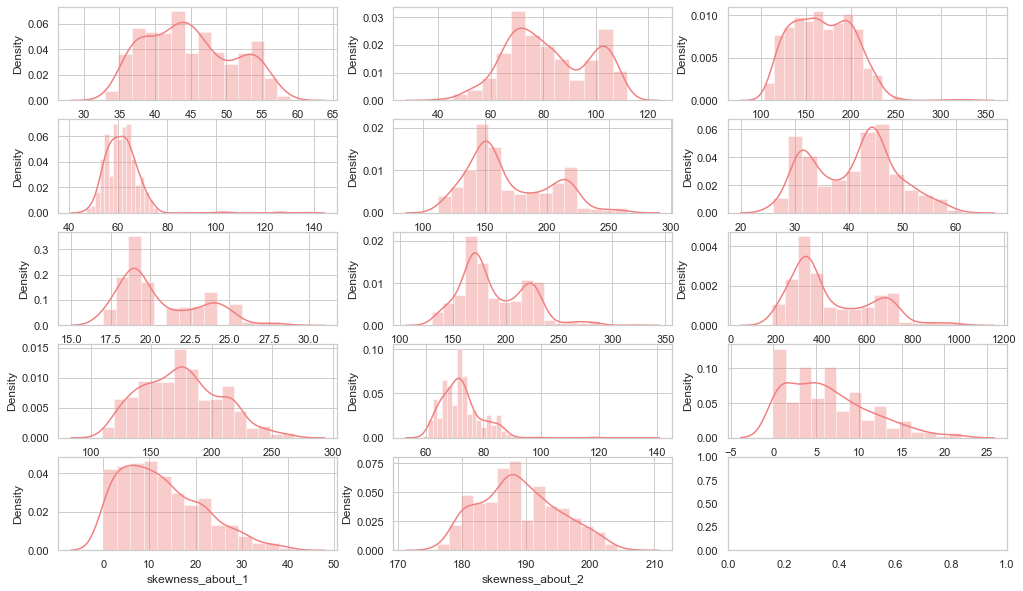

In [91]:
# Distribution of features with missing values
fig, axes = plt.subplots(5, 3,figsize=(17,10))
plt.grid(False)
sns.distplot(Vehicle_New.circularity, color="lightcoral", ax=axes[0,0])
sns.distplot(Vehicle_New.distance_circularity, color="lightcoral", ax=axes[0,1])
sns.distplot(Vehicle_New.radius_ratio, color="lightcoral", ax=axes[0,2])
sns.distplot(Vehicle_New.pr_axis_aspect_ratio, color="lightcoral", ax=axes[1,0])
sns.distplot(Vehicle_New.scatter_ratio, color="lightcoral", ax=axes[1,1])
sns.distplot(Vehicle_New.elongatedness, color="lightcoral", ax=axes[1,2])
sns.distplot(Vehicle_New.pr_axis_rectangularity, color="lightcoral", ax=axes[2,0])
sns.distplot(Vehicle_New.scaled_variance, color="lightcoral", ax=axes[2,1])
sns.distplot(Vehicle_New.scaled_variance_1, color="lightcoral", ax=axes[2,2])
sns.distplot(Vehicle_New.scaled_radius_of_gyration, color="lightcoral", ax=axes[3,0])
sns.distplot(Vehicle_New.scaled_radius_of_gyration_1, color="lightcoral", ax=axes[3,1])
sns.distplot(Vehicle_New.skewness_about, color="lightcoral", ax=axes[3,2])
sns.distplot(Vehicle_New.skewness_about_1, color="lightcoral", ax=axes[4,0])
sns.distplot(Vehicle_New.skewness_about_2, color="lightcoral", ax=axes[4,1])
plt.show()

In [92]:
# None of the distributions exibits normality, hence median will be used as an imputer for the missing values 

In [93]:
A = ['circularity','distance_circularity','radius_ratio','pr_axis_aspect_ratio',
                      'scatter_ratio','elongatedness','pr_axis_rectangularity','scaled_variance',
                      'scaled_variance_1','scaled_radius_of_gyration','scaled_radius_of_gyration_1',
                      'skewness_about','skewness_about_1','skewness_about_2']

In [94]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(Vehicle_New[A])
Vehicle_New[A] = imputer.transform(Vehicle_New[A]) 

In [95]:
# Data inspection post imputation 
Vehicle_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr_axis_aspect_ratio         846 non-null    float64
 5   max_length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr_axis_rectangularity       846 non-null    float64
 9   max_length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance_1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

In [96]:
Vehicle_New.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr_axis_aspect_ratio           0
max_length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr_axis_rectangularity         0
max_length_rectangularity      0
scaled_variance                0
scaled_variance_1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration_1    0
skewness_about                 0
skewness_about_1               0
skewness_about_2               0
hollows_ratio                  0
class                          0
dtype: int64

In [97]:
# Q.1(C)
# Visualize a Pie-chart and print percentage of values for variable ‘class’.

Counter({'car': 429, 'bus': 218, 'van': 199})


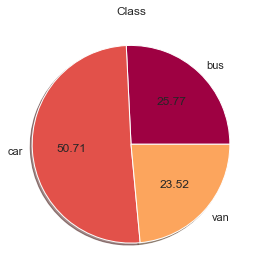

In [98]:
from collections import Counter
from matplotlib.gridspec import GridSpec
print(Counter(Vehicle_New['class']))
the_grid = GridSpec(2, 2)
plt.figure(1, figsize=(20,10)) 
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Class')
Vehicle_New.groupby('class').size().plot(kind='pie', autopct='%.2f',shadow=True, colors=colors)
plt.ylabel("")
plt.show()

In [99]:
# Q.1(D)
# Check for duplicate rows in the data and impute with correct approach.

In [100]:
duplicate = Vehicle_New.duplicated() 
print('Number of duplicate rows = %d' % (duplicate.sum()))

Number of duplicate rows = 0


In [101]:
# Q.2(A) 
# Split data into X and Y. [Train and Test optional] 

In [102]:
# Encoding the 'class' feature
class_label_encoder = LabelEncoder()
Vehicle_New['class'] = class_label_encoder.fit_transform(Vehicle_New['class'])
Vehicle_New['class']

0      2
1      2
2      1
3      2
4      0
      ..
841    1
842    2
843    1
844    1
845    2
Name: class, Length: 846, dtype: int32

In [103]:
X = Vehicle_New.drop(['class'], axis=1)
Y = Vehicle_New['class']
# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7) 

In [104]:
# Q.2(B) 
# Standardize the Data.

In [105]:
X_train_standard = X_train.copy() 
X_test_standard = X_test.copy() 
num_cols = Vehicle_New.select_dtypes(include = ['int64','float64'])
# Standardisation 
Scaler = StandardScaler() 
for i in num_cols:
    scale = StandardScaler().fit(X_train_standard[[i]])
    # Transforming Training data
    X_train_standard[i] = scale.transform(X_train_standard[[i]])
    # Transforming Test data 
    X_test_standard[i] = scale.transform(X_test_standard[[i]])

In [106]:
# Q.3(A) 
# Train a base Classification model using SVM

In [107]:
svc = SVC(random_state=7) 
svc.fit(X_train_standard, Y_train) 
Y_predict = svc.predict(X_train)

In [108]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 7,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [109]:
# Q.3(B)
# Print Classification metrics for train data

<AxesSubplot:>

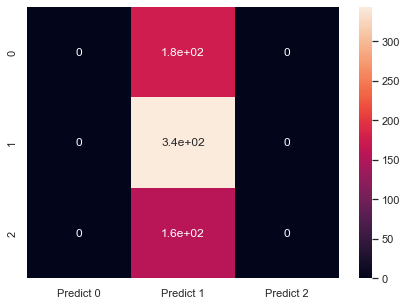

In [110]:
# Confusion matrix
cm = metrics.confusion_matrix(Y_train, Y_predict, labels=[0,1,2])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1","2"]],
                  columns = [i for i in ["Predict 0","Predict 1","Predict 2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [111]:
print(classification_report(Y_train, Y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       176
           1       0.51      1.00      0.67       344
           2       0.00      0.00      0.00       156

    accuracy                           0.51       676
   macro avg       0.17      0.33      0.22       676
weighted avg       0.26      0.51      0.34       676



In [112]:
# The SVC model is able to predict class 1 though the precision and F1 scores are not so good. 
# The model could not classify a silhouette in Class 0 and Class 2. 

# Cluster 1 classification scores 

# Recall
# The Recall score shows how many of the Actual Positives our model captures by labeling them as Positives (True Positives).
# The Recall score for Class 1 is 100%. 

# Precision
# The Precision score shows how precise our model is. 
# Out of the predicted positives, how many of them are actual positives. 
# The Precision score for class 1 is 51%

# F1 score
# The F1 score is a function of both Precision and Recall. 
# The F1 score for CLass 1 is 67% 

In [113]:
# Q.3(C)
# Apply PCA on the data with 10 components.

In [114]:
Vehicle_New_2 = Vehicle_New.drop(['class'], axis=1)
Vehicle_New_2.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


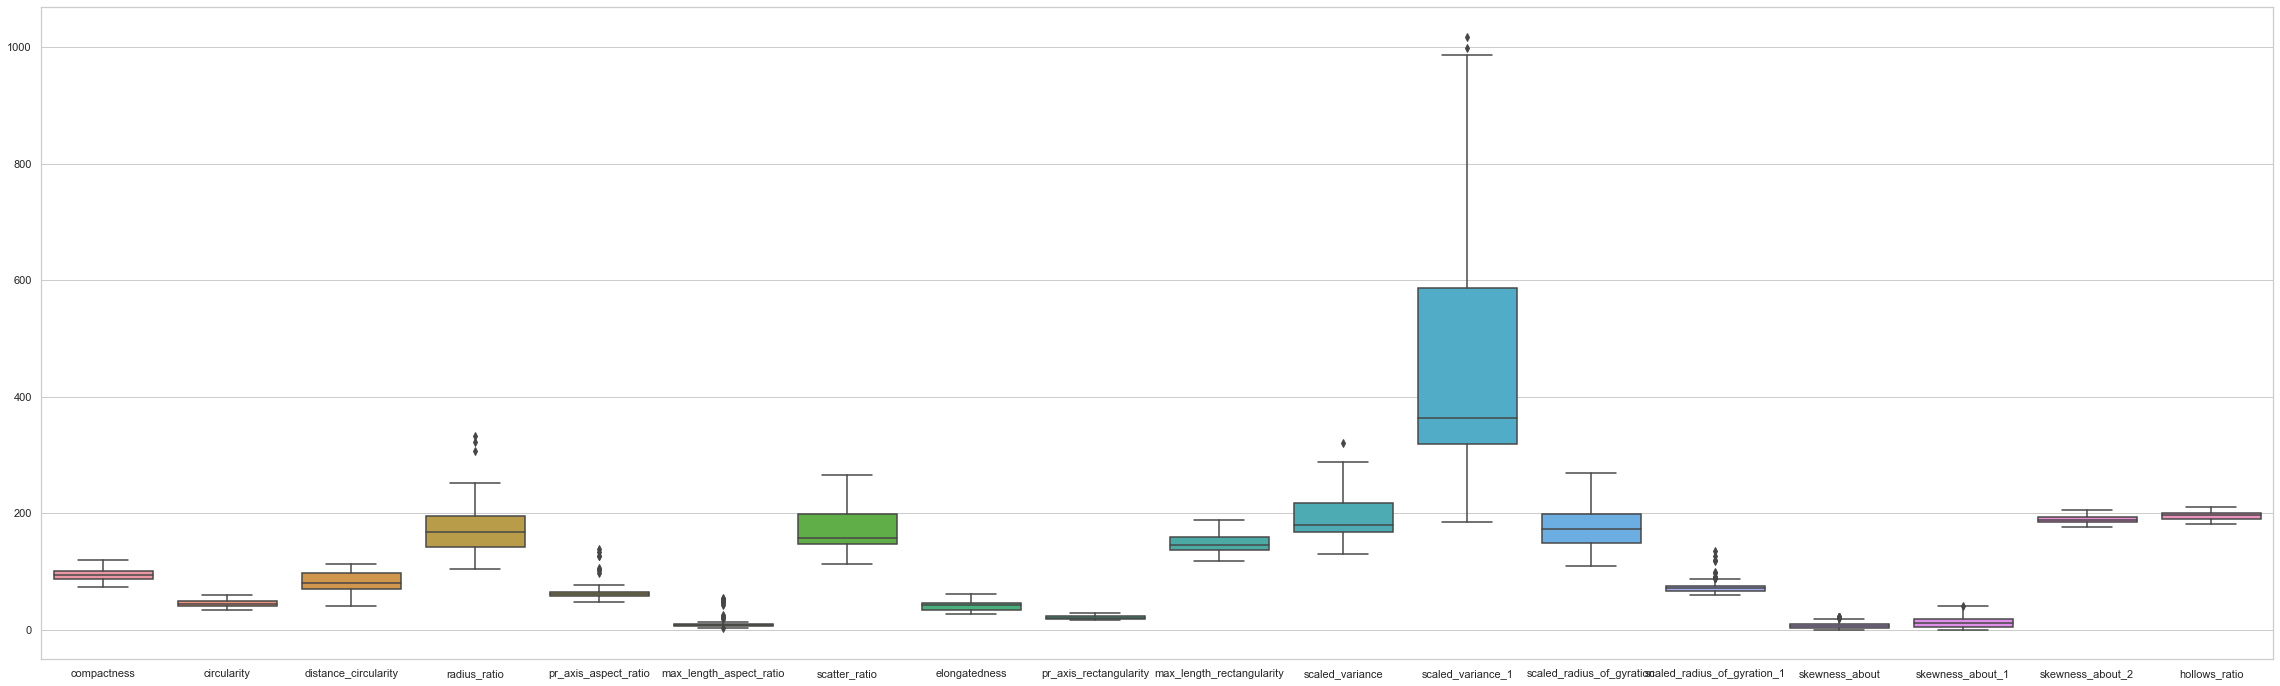

In [115]:
# Outliers detection
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(40,12))
sns.boxplot(data=Vehicle_New_2)
plt.show()

In [116]:
# Outliers are detected in 
# radius_ratio, pr_axis_aspect_ratio, max_length_aspect_ratio, scaled_variance, scaled_variance_1, scaled_radius_of_gyration
# skewness_about, skewness_about_1 

In [117]:
# In order to remove the outliers, we will apply logarithmic transformation. 
# Logarithmic transformation helps in restoring symmetry of the data 
Vehicle_New_2['radius_ratio'] = np.log(Vehicle_New_2['radius_ratio'])
Vehicle_New_2['pr_axis_aspect_ratio'] = np.log(Vehicle_New_2['pr_axis_aspect_ratio'])
Vehicle_New_2['max_length_aspect_ratio'] = np.log(Vehicle_New_2['max_length_aspect_ratio'])
Vehicle_New_2['scaled_variance'] = np.log(Vehicle_New_2['scaled_variance'])
Vehicle_New_2['scaled_variance_1'] = np.log(Vehicle_New_2['scaled_variance_1'])
Vehicle_New_2['scaled_radius_of_gyration_1'] = np.log(Vehicle_New_2['scaled_radius_of_gyration_1'])
Vehicle_New_2.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio
0,95,48.0,83.0,5.181784,4.276666,2.302585,162.0,42.0,20.0,159,5.170484,5.937536,184.0,4.248495,6.0,16.0,187.0,197
1,91,41.0,84.0,4.948760,4.043051,2.197225,149.0,45.0,19.0,143,5.135798,5.799093,158.0,4.276666,9.0,14.0,189.0,199
2,104,50.0,106.0,5.342334,4.189655,2.302585,207.0,32.0,23.0,158,5.407172,6.453625,220.0,4.290459,14.0,9.0,188.0,196
3,93,41.0,82.0,5.068904,4.143135,2.197225,144.0,46.0,19.0,143,5.075174,5.733341,127.0,4.143135,6.0,10.0,199.0,207
4,85,44.0,70.0,5.323010,4.634729,3.951244,149.0,45.0,19.0,144,5.484797,5.783825,188.0,4.844187,9.0,11.0,180.0,183


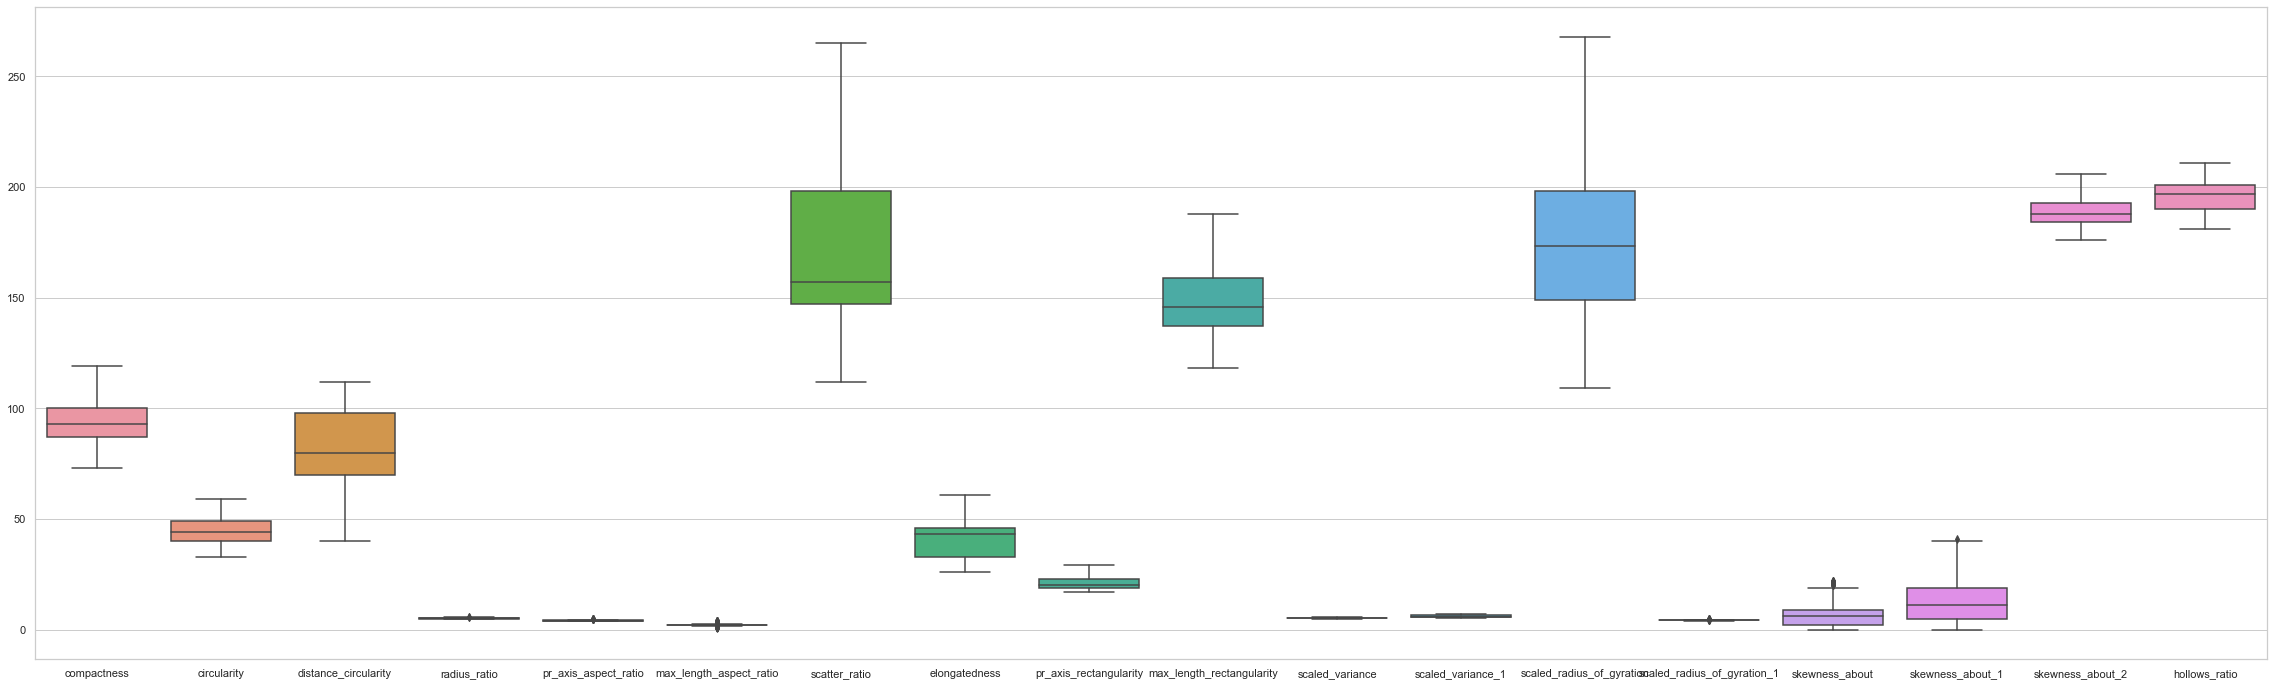

In [118]:
# Outliers detection post log transformation
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=(40,12))
sns.boxplot(data=Vehicle_New_2)
plt.show()

In [119]:
# Majority of outliers are removed post log transformation

In [120]:
# Scaling 
from scipy.stats import zscore
Vehicle_New_2.dtypes
numeric_cols = Vehicle_New_2.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
Vehicle_New_2[numeric_cols] = Vehicle_New_2[numeric_cols].apply(zscore)

In [121]:
Vehicle_New_2.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio
0,0.160580,0.518073,0.057177,0.363779,1.449217,0.669362,-0.207598,0.136262,-0.224342,0.758332,-0.344627,-0.188955,0.285705,-0.306642,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.810707,-0.647775,0.352541,-0.599423,0.520519,-0.610886,-0.344578,-0.558767,-0.550102,-0.513630,-0.013737,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.172986,0.668179,0.669362,1.148719,-1.144597,0.935290,0.689401,1.116623,1.157328,1.392477,0.129678,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.205156,0.250602,0.352541,-0.750125,0.648605,-0.610886,-0.344578,-0.933048,-0.721623,-1.466683,-1.402121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.075588,4.663290,5.626910,-0.599423,0.520519,-0.610886,-0.275646,1.595862,-0.589929,0.408680,5.887021,0.538390,-0.179311,-1.450481,-1.699181


In [122]:
# Principal Component Analysis 
# Problem: Apply PCA on the data with 10 components

In [123]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=7)
data_reduced = pca.fit_transform(Vehicle_New_2)
data_reduced.transpose()

array([[-0.52351245,  1.49810669, -3.83265886, ..., -4.8421    ,
         3.3203907 ,  5.12447909],
       [-0.38558998, -0.40595055,  0.2595606 , ...,  0.00539665,
        -1.09494878,  0.37898475],
       [ 1.31158166, -0.45404758,  0.13261204, ...,  0.92957177,
        -0.47205627, -0.7349925 ],
       ...,
       [ 0.37503853, -0.13152711, -0.39525692, ...,  0.18742721,
        -0.3285939 ,  0.41238226],
       [-0.79626528,  0.2092997 , -0.31051057, ..., -0.56955143,
        -0.43042558, -0.52241416],
       [ 0.12646669, -0.10793833, -0.47138917, ...,  0.57605741,
        -0.85412458, -0.24981166]])

In [124]:
pca.components_

array([[-0.27187941, -0.28882913, -0.30399449, -0.2704648 , -0.09023772,
        -0.15608717, -0.31173469,  0.31197967, -0.30789863, -0.27940779,
        -0.30632008, -0.31338134, -0.26552159,  0.03207509, -0.04039249,
        -0.0582289 , -0.03856283, -0.08443735],
       [-0.0974281 ,  0.13979445, -0.05070119, -0.20961254, -0.19290811,
        -0.0909866 ,  0.07255742, -0.01063812,  0.08464704,  0.12868335,
         0.05816603,  0.04314001,  0.22098873,  0.48204112, -0.04392521,
        -0.10962628, -0.52300937, -0.52529299],
       [-0.19649438,  0.02750087, -0.07327022,  0.24790288,  0.68448204,
         0.43406208, -0.11477699,  0.05640802, -0.13232153,  0.03306615,
         0.04199324, -0.08554266,  0.02168954,  0.27282888, -0.24904764,
        -0.2267229 , -0.06563135, -0.01425763],
       [ 0.08719925,  0.18610104, -0.06549836, -0.0642277 , -0.0050362 ,
         0.06398058, -0.09503578,  0.09124934, -0.08872964,  0.19269081,
        -0.12836999, -0.09400407,  0.19561508, -0.080

In [125]:
# Q.3(D)
# Visualize Cumulative Variance Explained with Number of Components.

In [126]:
# Covariance matrix
cov_matrix = np.cov(Vehicle_New_2.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.70241875  0.11883518  0.32215538
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76124732  0.80338614
   0.58593517 -0.25336039  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.62081137  0.17136843  0.42344682
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80241427  0.83923381
   0.92691166  0.06556439  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.78538743  0.19061302  0.5003507
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87895283  0.91474832
   0.70660663 -0.22461157  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.70241875  0.62081137  0.78538743  1.00118343  0.67039746  0.48947488
   0.74493786 -0.81035489  0.7163026   0.56908237  0.81221912  0.78073969
   0.53348034 -0.27903966  0.05016228  0.17593275  0.43001943  0.51619785]
 [ 0.11883518  0.17136843  0.19061302  0.67039746  1.00118343  0.42604813
   0.12772029

In [127]:
# Identification of Eigen values and Eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.71879415e-01 -9.74280970e-02  1.96494378e-01  8.71992526e-02
  -1.99924315e-02 -6.78374977e-02 -3.56904374e-01  7.17253605e-01
   3.61752672e-01 -2.34603776e-01 -2.66987814e-02 -2.01615718e-02
  -1.75446189e-01 -6.10698865e-03 -1.20419945e-02 -4.45741405e-02
   5.96186337e-02  3.51619487e-03]
 [-2.88829133e-01  1.39794450e-01 -2.75008656e-02  1.86101043e-01
  -3.08377215e-02  1.71586711e-01  3.84948392e-01  1.25361305e-01
   1.72863491e-02  1.14907965e-01  1.77790801e-02 -2.22743064e-01
  -1.17593835e-01 -8.38175421e-03 -3.30340990e-02 -5.71679030e-02
  -4.42306599e-01  6.24520074e-01]
 [-3.03994486e-01 -5.07011875e-02  7.32702198e-02 -6.54983598e-02
   7.30432144e-02  1.17928481e-01 -9.45102790e-02 -3.03249355e-01
   2.32258362e-01 -1.91040349e-01  7.96674132e-01 -1.97152166e-02
   1.09433053e-01  1.81045871e-02  2.05198554e-03  2.71409721e-02
   1.53229857e-01  1.14808771e-01]
 [-2.70464803e-01 -2.09612541e-01 -2.47902878e-01 -6.42276999e-02
  -5.72065541e-02 -

In [128]:
# Variance and Cumulative Variance by each eigen vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.29807758  70.82016719  78.62450596  85.19346955  90.1556429
  94.18921207  96.18598969  97.51059781  98.33347158  98.83914974
  99.19049357  99.45665563  99.63202156  99.76983027  99.88113143
  99.94782842  99.98017492 100.        ]


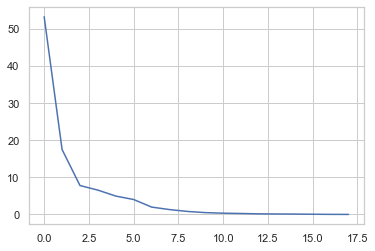

In [129]:
plt.plot(var_exp)

In [130]:
# There is a steep drop in explained variance with increase in the number of principal components. 
# The trajectory of the curve tapered after 10 (or say 11) principal components 

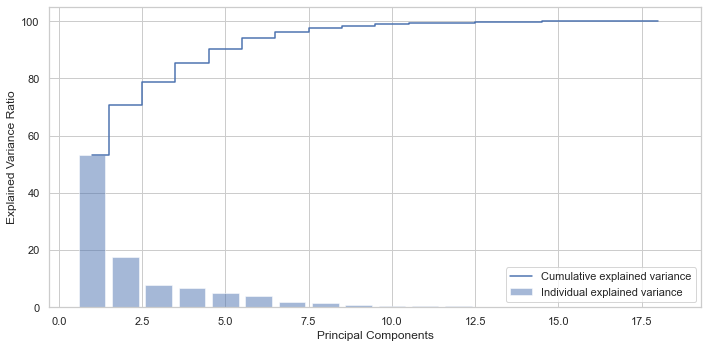

In [131]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [132]:
# Q.3(E)
# Draw a horizontal line on the above plot to highlight the threshold of 90%.

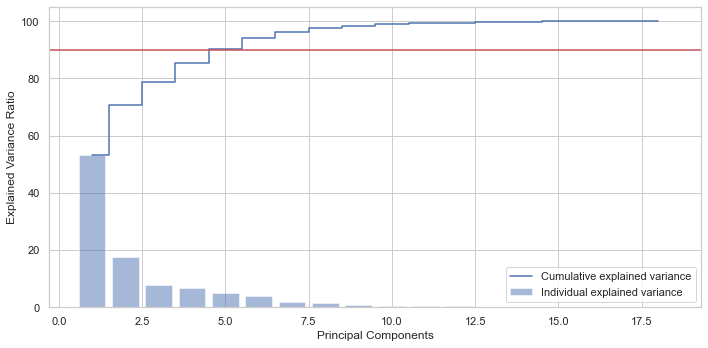

In [133]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.axhline(y = 90, color = 'r', linestyle = '-')
plt.show()

In [134]:
# Q.3(F)
# Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. 

In [135]:
# Variance and Cumulative Variance by each eigen vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.29807758  70.82016719  78.62450596  85.19346955  90.1556429
  94.18921207  96.18598969  97.51059781  98.33347158  98.83914974
  99.19049357  99.45665563  99.63202156  99.76983027  99.88113143
  99.94782842  99.98017492 100.        ]


In [136]:
# Minimum components that can explain 90% of the variance in the dataset is 5. 
# Applying PCA on the data with 5 principal components
pca = PCA(n_components=5, random_state=7)
data_reduced = pca.fit_transform(Vehicle_New_2)
data_reduced.transpose()

array([[-0.52351245,  1.49810669, -3.83265886, ..., -4.8421    ,
         3.3203907 ,  5.12447909],
       [-0.38558998, -0.40595055,  0.2595606 , ...,  0.00539665,
        -1.09494878,  0.37898475],
       [ 1.31158166, -0.45404758,  0.13261204, ...,  0.92957177,
        -0.47205627, -0.7349925 ],
       [ 0.15076965,  0.30489427,  1.20611266, ...,  0.26885593,
        -1.87183255, -1.15132986],
       [ 0.60261441,  0.84685   ,  0.55681273, ..., -0.93380951,
         0.19746407, -0.13878007]])

In [137]:
pca.components_

array([[-0.27187941, -0.28882913, -0.30399449, -0.2704648 , -0.09023772,
        -0.15608717, -0.31173469,  0.31197967, -0.30789863, -0.27940779,
        -0.30632008, -0.31338134, -0.26552159,  0.03207509, -0.04039249,
        -0.0582289 , -0.03856283, -0.08443735],
       [-0.0974281 ,  0.13979445, -0.05070119, -0.20961254, -0.19290811,
        -0.0909866 ,  0.07255742, -0.01063812,  0.08464704,  0.12868335,
         0.05816603,  0.04314001,  0.22098873,  0.48204112, -0.04392521,
        -0.10962628, -0.52300937, -0.52529299],
       [-0.19649438,  0.02750087, -0.07327022,  0.24790288,  0.68448204,
         0.43406208, -0.11477699,  0.05640802, -0.13232153,  0.03306615,
         0.04199324, -0.08554266,  0.02168954,  0.27282888, -0.24904764,
        -0.2267229 , -0.06563135, -0.01425763],
       [ 0.08719925,  0.18610104, -0.06549836, -0.0642277 , -0.0050362 ,
         0.06398058, -0.09503578,  0.09124934, -0.08872964,  0.19269081,
        -0.12836999, -0.09400407,  0.19561508, -0.080

In [138]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 5,
 'random_state': 7,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [139]:
# Q.3(G)
# Train SVM model on components selected from above step.
# The 5 components which explained 90% of the variance in the dataset are 
# compactness, circularity, distance_circularity, radius_ratio, pr_axis_aspect_ratio

In [140]:
# Using 5 components as Features in the SVM model 
X = Vehicle_New_2.iloc[:,[0,1,2,3,4]]
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio
0,0.160580,0.518073,0.057177,0.363779,1.449217
1,-0.325470,-0.623732,0.120741,-0.810707,-0.647775
2,1.254193,0.844303,1.519141,1.172986,0.668179
3,-0.082445,-0.623732,-0.006386,-0.205156,0.250602
4,-1.054545,-0.134387,-0.769150,1.075588,4.663290


In [141]:
Class = Vehicle_New['class']
Vehicle_New_2['Class'] = Class

In [142]:
Vehicle_New_2.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,Class
0,0.160580,0.518073,0.057177,0.363779,1.449217,0.669362,-0.207598,0.136262,-0.224342,0.758332,-0.344627,-0.188955,0.285705,-0.306642,-0.073812,0.380870,-0.312012,0.183957,2
1,-0.325470,-0.623732,0.120741,-0.810707,-0.647775,0.352541,-0.599423,0.520519,-0.610886,-0.344578,-0.558767,-0.550102,-0.513630,-0.013737,0.538390,0.156798,0.013265,0.452977,2
2,1.254193,0.844303,1.519141,1.172986,0.668179,0.669362,1.148719,-1.144597,0.935290,0.689401,1.116623,1.157328,1.392477,0.129678,1.558727,-0.403383,-0.149374,0.049447,1
3,-0.082445,-0.623732,-0.006386,-0.205156,0.250602,0.352541,-0.750125,0.648605,-0.610886,-0.344578,-0.933048,-0.721623,-1.466683,-1.402121,-0.073812,-0.291347,1.639649,1.529056,2
4,-1.054545,-0.134387,-0.769150,1.075588,4.663290,5.626910,-0.599423,0.520519,-0.610886,-0.275646,1.595862,-0.589929,0.408680,5.887021,0.538390,-0.179311,-1.450481,-1.699181,0


In [143]:
X = Vehicle_New_2.iloc[:,[0,1,2,3,4]]
Y = Vehicle_New_2['Class']
# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7) 
svc = SVC(random_state=7) 
svc.fit(X_train, Y_train) 
Y_predict = svc.predict(X_train)

In [144]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 7,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [145]:
# Q.3(H)
# Print Classification metrics for train data of above model and share insights.

<AxesSubplot:>

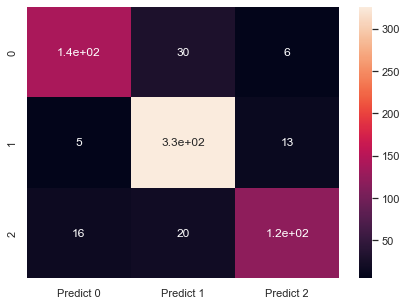

In [146]:
# Confusion matrix
cm = metrics.confusion_matrix(Y_train, Y_predict, labels=[0,1,2])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1","2"]],
                  columns = [i for i in ["Predict 0","Predict 1","Predict 2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [147]:
print(classification_report(Y_train, Y_predict))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       176
           1       0.87      0.95      0.91       344
           2       0.86      0.77      0.81       156

    accuracy                           0.87       676
   macro avg       0.87      0.84      0.85       676
weighted avg       0.87      0.87      0.86       676



In [148]:
# Insights
# The SVC model with 5 principal components is able to predict classes in a superior manner than the one that used 
# all of the 18 components

# Precision 
# The precision score shows how precise our model is. 
# Out of the predicted positives, how many of them are actual positives. 
# The Precision score is 87% for Class 0 and 1 and 86% for Class 2. 

# Recall
# The Recall score shows how many of the Actual Positives our model captures by labeling them as Positives (True Positives).
# The Recall score is 80% for Class 0, 95% for Class 1 and 77% for class 2. 

# F1 score
# The F1 score is a function of both Precision and Recall. 
# The F1 score is 83% for Class 0, 91% for Class 1 and 81% for Class 2. 

# We found that the evaluation scores on train data were good for Class 1. The scores for Class 0 and Class 2 were however, 
# better than that of the SVM model with 18 features. 

In [149]:
# Q.4(A)
# Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [150]:
# Training another SVM model by changing the kernel hyperparameter from rbf to linear 
svc = SVC(kernel='linear', random_state=7)
svc.fit(X_train, Y_train) 
Y_predict = svc.predict(X_train)

In [151]:
# Tuning hyperparameters of the SVC model  
# Cross validation 
# Here, we use a meta-estimator called GridSearchCV.It implements a “fit” and a “score” method.
# The parameters of the meta-estimator are optimized by cross-validated grid-search over a parameter grid.
from sklearn.model_selection import GridSearchCV
# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid'],
              'degree': [0, 1, 2, 3, 4, 5, 6]}  
 
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
# Fitting the model for grid search
grid.fit(X_train, Y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 525 candidates, totalling 2625 fits
[CV 1/5] END C=0.1, degree=0, gamma=1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=1, kernel=linear;, score=0.654 total time=   0.0s
[CV 2/5] END C=0.1, degree=0, gamma=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 3/5] END C=0.1, degree=0, gamma=1, kernel=linear;, score=0.711 total time=   0.0s
[CV 4/5] END C=0.1, degree=0, gamma=1, kernel=linear;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.1, degree=0, gamma=1, kernel=linear;, score=0.763 total time=   0.0s
[CV 1/5] END C=0.1, degree=0, gamma=1, kernel=sigmoid;, score=0.544 total time=   0.0s
[CV 

In [152]:
# Q.4(B)
# Share best Parameters observed from above step
print(grid.best_params_)  

{'C': 10, 'degree': 0, 'gamma': 1, 'kernel': 'rbf'}


In [153]:
# Q.4(C)
# Print Classification metrics for train data of above model and share relative improvement in 
# performance in all the models along with insights

In [154]:
# SVC model with the best parameters after hyperparameter tuning  
from sklearn.svm import SVC  
svc = SVC(C=10, gamma=1, degree=0, kernel='rbf', random_state=7)
svc.fit(X_train, Y_train) 
Y_predict = svc.predict(X_train)

<AxesSubplot:>

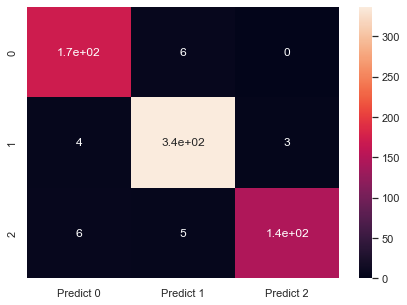

In [155]:
# Confusion matrix
cm = metrics.confusion_matrix(Y_train, Y_predict, labels=[0,1,2])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1","2"]],
                  columns = [i for i in ["Predict 0","Predict 1","Predict 2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [156]:
print(classification_report(Y_train, Y_predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       176
           1       0.97      0.98      0.97       344
           2       0.98      0.93      0.95       156

    accuracy                           0.96       676
   macro avg       0.96      0.96      0.96       676
weighted avg       0.96      0.96      0.96       676



In [157]:
# Relative performance of all the models along with insights

Relative performance of the SVM model 

For class 0

          18 Features | 5 principal feature | 5 principal features after tuning
          ----------- | --------------------| --------------------------------|
    Precision    0.00            0.87                  0.94
    Recall       0.00            0.80                  0.97
    F1 score     0.00            0.83                  0.96

For class 1

          18 Features | 5 principal feature | 5 principal features after tuning
          ----------- | --------------------| --------------------------------|
    Precision    0.51            0.87                  0.97
    Recall       1.00            0.95                  0.98
    F1 score     0.67            0.91                  0.97

For class 2

          18 Features | 5 principal feature | 5 principal features after tuning
          ----------- | --------------------| --------------------------------|
    Precision    0.00            0.86                  0.98
    Recall       0.00            0.77                  0.93
    F1 score     0.00            0.81                  0.95

In [158]:
# Insights
# SVM model without principal component decomposition produced spurious results. The model failed to classify the silhouettes 
# properly

# SVM model with 5 principal features after principal component decomposition produced superior results. 
# Its performance scores in terms of Precision, Recall and F1 score is superior relative to the previous SVM model

# The SVM model post proncipal component decomposition and hyperparameter tuning produced the best results.
# Of the three SVM models, its peformance scores in terms of Precision, Recall and F1 score is the best. 

# Hence, it shows that dimensionality reduction by principal component decomposition combined with hyperparameter tuning 
# can produce superior model outcomes 

In [159]:
# Q.5(A)
# Explain pre-requisite/assumptions of PCA

# Ans. 
# 1. Assumes that the independent variables are continuous.  
# 2. Assumes linear relationships between attributes.PCA generates new variables by linear combinations of old variables.    
# 3. Assumes multicollinearity of attributes. If attributes are orthogonal, PCA will fail to reduce the dimensionality.
# 4. Assumes the presence of no significant outliers as they can exert disproportionate influence on model outcomes.  
# 5. Assumes that components with larger variances (called principal components) indicate signal while 
# components with smaller variances indicate noise. 

In [160]:
# Q.5(B)
# Explain advantages and limitations of PCA

# Ans. 
# Advantages
# 1. PCA helps in dimensionality reduction. It reduces data by projecting higher dimension data geometrically 
# into lower dimensional hyperplane. By doing this, PCA removes the curse of dimensionality.      
# 2. PCA is designed to remove the problem of multicollinearity in features. Post PCA, features become independent or 
# orthogonal to each other. 
# 3. PCA tells us the importance of features through eigenvalues of the principal components. This helps in reducing 
# dimensionality by retaining only the important features of the dataset.     
# 4. PCA reduces the problem of model overfit. 
# 5. PCA improves data visualisation of high dimensional data. 
# 6. PCA decreases computational times for fitting models as we are using fewer dimensions.   
# 7. PCA decreases system storage requirements.

# Limitations
# 1. PCA is scale variant. The efficacy of PCA is influenced by the scale of attributes in the dataset. 
# PCA shows the features with the maximum variance. If the variance in one feature is less than that of the other owing to their 
# scales (eg, height and weight), PCA will generate spurious results.   
# 2. PCA causes independent variables less interpretable. Post principal component decomposition, the original features 
# are transformed into principal components. Principal components are less interpretable. 
# 3. Dimensionality reduction by PCA may incur information loss.   
# 4. PCA assumes linear relationship between attributes. It becomes ineffective when relationships are non linear. 
# 5. Presence of skewness in data with long tails can impact the effectiveness of PCA.  
# 6. PCA is a non parametric algorithm hence, no prior information can be incorporated.    